In [1]:
# Ames Housing Linear Regression Project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Exploration and Cleaning
# Load the dataset
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Displaying basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
# Check for missing values
print(df.isnull().sum())


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [6]:
# Handling missing values 
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19136\4079374690.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19136\4079374690.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
# Checking for missing values
print(df.isnull().sum())

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64


In [8]:
#Feature Selection
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('SalePrice') # Remove target variable from features


In [12]:
# Creating correlation matrix
corr_matrix = df[numeric_features + ['SalePrice']].corr()
corr_matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.006102,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.031045,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.087894,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.225672,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.391497,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.003634,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.006102,-0.087894,-0.391497,1.000000,0.362758,0.198917,-0.067140,0.114341,0.086139,0.201685,...,0.102790,0.150107,0.012165,0.025157,0.070101,0.160860,0.035368,0.010477,-0.007123,0.340256
Lot Area,0.031354,0.034868,-0.204613,0.362758,1.000000,0.097188,-0.034759,0.023258,0.021682,0.125950,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.198917,0.097188,1.000000,-0.094812,0.597027,0.569609,0.423089,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.067140,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.132472,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.114341,0.023258,0.597027,-0.368773,1.000000,0.612095,0.306797,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.086139,0.021682,0.569609,0.047680,0.612095,1.000000,0.191740,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.031045,-0.225672,0.003634,0.201685,0.125950,0.423089,-0.132472,0.306797,0.191740,1.000000,...,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,-0.002358,-0.016876,0.502196


In [20]:
# Selecting top correlated features
top_features = corr_matrix['SalePrice'][abs(corr_matrix['SalePrice']) > 0.5].index.tolist()
top_features.remove('SalePrice')
top_features


['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

In [14]:
#Data Splitting
X = df[top_features]
y = df['SalePrice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test_scaled)

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Root Mean Squared Error: 38216.803164026394
R-squared Score: 0.8178340738759294


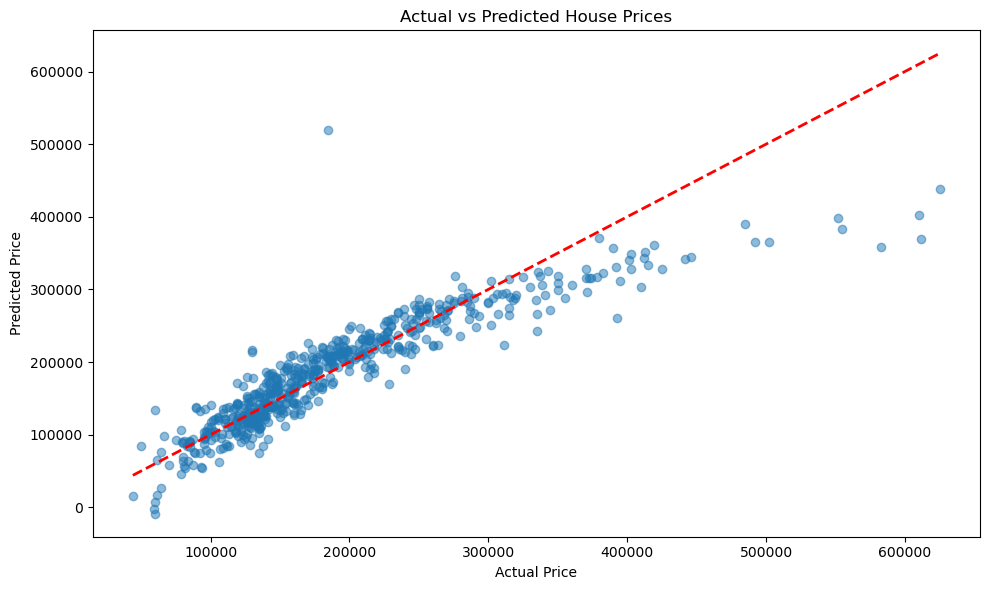

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()

           feature    importance
0     Overall Qual  26519.037439
6      Gr Liv Area  24838.995034
1       Year Built   7886.240548
4    Total Bsmt SF   7773.760882
2   Year Remod/Add   6914.936536
5       1st Flr SF   5294.550373
9      Garage Cars   5107.251626
3     Mas Vnr Area   5100.590572
10     Garage Area   4756.620932
7        Full Bath   4227.259525
8    Garage Yr Blt    711.066708


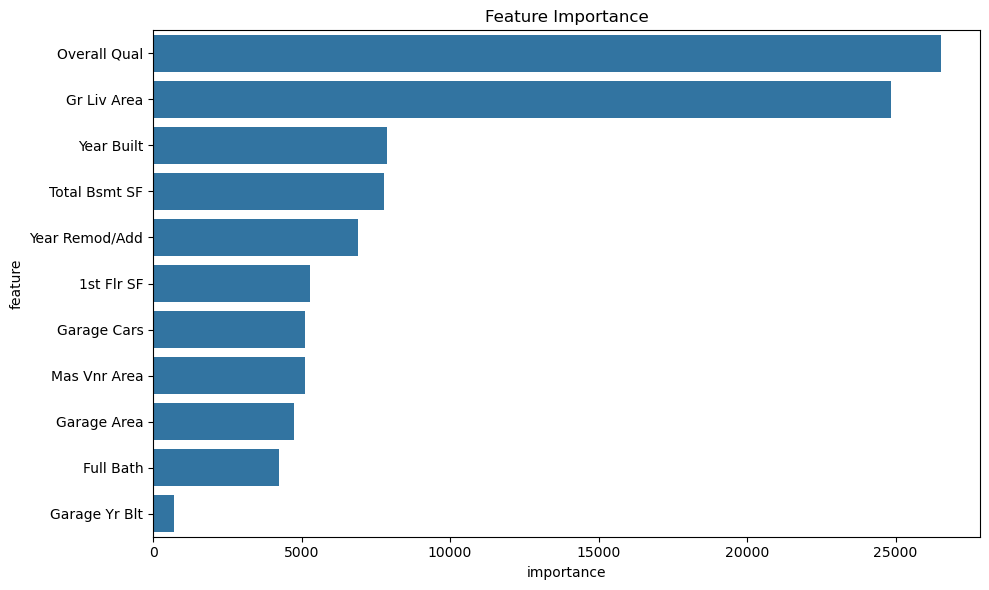

In [25]:
# Feature importance
feature_importance = pd.DataFrame({'feature': top_features, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()